In [1]:
from datascience import *
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/wide_chts_data.csv')
# data.with_column('age_ctgry', 0)

In [3]:
data['age_ctgry']=[0]*len(data['age'])
data.loc[data['age']>10,'age_ctgry']=1
data.loc[data['age']>20,'age_ctgry']=2
data.loc[data['age']>30,'age_ctgry']=3
data.loc[data['age']>40,'age_ctgry']=4
data.loc[data['age']>50,'age_ctgry']=5
data.loc[data['age']>60,'age_ctgry']=6
data




,observation_id,choice,availability_drive_alone,availability_shared_ride_2,availability_shared_ride_3+,availability_walk_transit_walk,availability_drive_transit_walk,availability_walk_transit_drive,availability_walk,availability_bicycle,...,total_travel_distance_shared_ride_3+,total_travel_distance_walk,total_travel_distance_bicycle,total_travel_cost_drive_alone,total_travel_cost_shared_ride_2,total_travel_cost_shared_ride_3+,total_travel_cost_walk_transit_walk,total_travel_cost_drive_transit_walk,total_travel_cost_walk_transit_drive,age_ctgry
0,1,1,1,1,1,1,1,1,1,1,...,9.10,8.38,8.38,1.6817,0.9609,0.6726,5.84,3.22,3.02,5
1,2,1,1,1,1,1,1,1,1,1,...,9.10,8.38,8.38,1.6817,0.9609,0.6726,4.83,3.22,3.22,5
2,3,2,1,1,1,1,1,1,0,0,...,31.94,NaN,NaN,9.1125,5.2071,3.6450,6.95,7.75,5.98,5
3,4,8,0,1,1,1,0,1,1,1,...,2.23,2.14,2.14,NaN,0.2355,0.1649,3.22,NaN,3.22,4
4,5,7,0,1,1,1,0,1,1,1,...,0.96,0.96,0.96,NaN,0.1014,0.0710,3.22,NaN,3.22,4
5,6,2,1,1,1,1,1,1,1,1,...,7.40,7.16,7.16,1.3675,0.7815,0.5470,3.22,3.98,3.22,4
6,7,1,1,1,1,1,1,1,1,1,...,9.47,9.24,9.24,1.7501,1.0000,0.7000,3.22,3.22,3.22,4
7,8,3,1,1,1,1,1,1,1,1,...,4.70,4.70,4.70,0.8686,0.4964,0.3474,3.22,3.22,3.22,0
8,9,4,1,1,1,1,1,1,1,0,...,4.87,4.78,NaN,0.9000,0.5143,0.3600,3.22,3.22,3.22,4
9,10,7,1,1,1,1,1,1,1,1,...,9.86,9.62,9.62,1.8222,1.0412,0.7288,3.22,3.22,3.22,5


In [4]:
data.pivot('age', ['choice'])
# bt = data.where(np.logical_and(data.column('bike_trips')<=97,data.column('walk_trips')<=97))

KeyError: 'Level choice not found'

In [6]:
data.columns
data['tt'] = 0 
data['cost'] = 0 
data['walk_cost'] = 0 
data['bike_cost'] = 0
data[['da_tt', 's2_tt', 's3_tt','wtw_tt','dtw_tt','dtw_tt','wtd_tt','walk_tt','bike_tt']]=0
data[['da_cost', 's2_cost', 's3_cost','wtw_cost','dtw_cost','dtw_cost','wtd_cost','walk_cost','bike_cost']]=0

# df.loc[df['x'] < -2, 'y'] = 1
data.loc[data['choice']==1,'tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']==2,'tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']==3,'tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']==4,'tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']==5,'tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']==6,'tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']==7,'tt'] = data['total_travel_time_walk']
data.loc[data['choice']==8,'tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']==1,'cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']==2,'cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']==3,'cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']==4,'cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']==5,'cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']==6,'cost'] = data['total_travel_cost_walk_transit_drive']


data.loc[data['choice']==1,'da_tt'] = data['total_travel_time_drive_alone']
data.loc[data['choice']==2,'s2_tt'] = data['total_travel_time_shared_ride_2']
data.loc[data['choice']==3,'s3_tt'] = data['total_travel_time_shared_ride_3+']
data.loc[data['choice']==4,'wtw_tt'] = data['total_travel_time_walk_transit_walk']
data.loc[data['choice']==5,'dtw_tt'] = data['total_travel_time_drive_transit_walk']
data.loc[data['choice']==6,'wtd_tt'] = data['total_travel_time_walk_transit_drive']
data.loc[data['choice']==7,'walk_tt'] = data['total_travel_time_walk']
data.loc[data['choice']==8,'bike_tt'] = data['total_travel_time_bicycle']

data.loc[data['choice']==1,'da_cost'] = data['total_travel_cost_drive_alone']
data.loc[data['choice']==2,'s2_cost'] = data['total_travel_cost_shared_ride_2']
data.loc[data['choice']==3,'s3_cost'] = data['total_travel_cost_shared_ride_3+']
data.loc[data['choice']==4,'wtw_cost'] = data['total_travel_cost_walk_transit_walk']
data.loc[data['choice']==5,'dtw_cost'] = data['total_travel_cost_drive_transit_walk']
data.loc[data['choice']==6,'wtd_cost'] = data['total_travel_cost_walk_transit_drive']

In [7]:
data['total_travel_time_drive_alone']
data[['tt','cost']]

data.to_csv('data/modechoice.csv', index=False)

In [8]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

mc = Table.read_table('data/modechoice.csv')

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


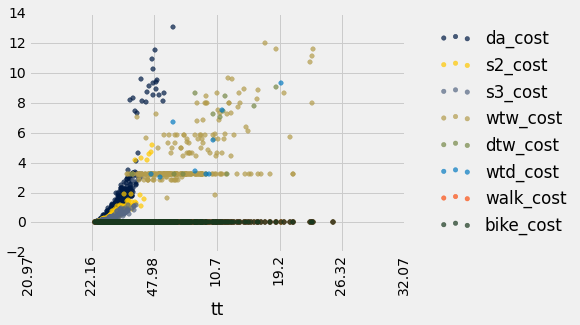

In [10]:
mc
# mc.select(['tt','cost']).scatter('cost')
mc.select(['da_cost', 's2_cost', 's3_cost','wtw_cost','dtw_cost', 
           'dtw_cost','wtd_cost', 'walk_cost', 'bike_cost','tt']).scatter('tt')


In [ ]:
mc.select(['da_tt', 's2_tt', 's3_tt','wtw_tt','dtw_tt',
           'dtw_tt','wtd_tt', 'walk_tt', 'bike_tt','cost']).scatter('cost', label = '$')